In [1]:
import pandas as pd
anuncio = pd.read_csv("advertising.csv")
display(anuncio)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


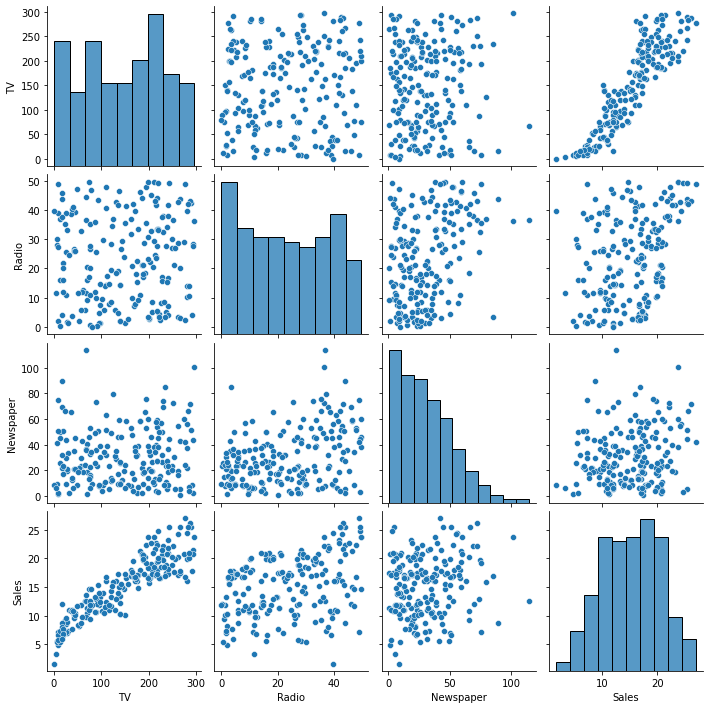

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

grafico = sns.pairplot(anuncio)
plt.show()

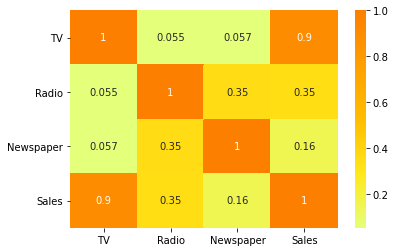

In [6]:
grafico = sns.heatmap(anuncio.corr(), cmap="Wistia", annot=True)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
# X -> valores que usamos para fazer a previsão (no caso, a tabela toda menos vendas).
# Y -> O valor que queremos calcular/prever (no caso, vendas).
x = anuncio.drop("Sales", axis=1)
y = anuncio["Sales"]

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2)

In [9]:
# Se queremos descobrir um número, o quanto vai vender, então temos um problema de regressão.
# Se queremos descobrir uma categoria, se vai ou não vender, então temos um problema de Classificação.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

linear = LinearRegression()
random = RandomForestRegressor()

linear.fit(x_treino, y_treino)
random.fit(x_treino, y_treino)

RandomForestRegressor()

In [10]:
from sklearn import metrics

teste_linear = linear.predict(x_teste)
teste_random = random.predict(x_teste)

# r²
linear_r2 = metrics.r2_score(y_teste, teste_linear)
random_r2 = metrics.r2_score(y_teste, teste_random)

print(linear_r2, random_r2)

# erro
linear_erro = metrics.mean_squared_error(y_teste, teste_linear)
random_erro = metrics.mean_squared_error(y_teste, teste_random)

print(linear_erro, random_erro)

0.8667034285280134 0.9491575734991433
2.819181664557503 1.075301750000003


<AxesSubplot:>

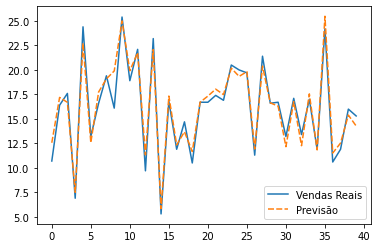

In [11]:
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_teste
tabela_comparacao["Previsão"] = teste_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True)

sns.lineplot(data=tabela_comparacao)

In [12]:
print(random.feature_importances_)

[0.86547547 0.12285407 0.01167046]


In [13]:
print(anuncio[["Radio", "Newspaper"]].sum())

Radio        4652.8
Newspaper    6110.8
dtype: float64
